C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7944\550491050.py:8: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


    years_of_study  years_of_coding  clipped_study  clipped_coding  log_study  \
1            3.000            7.000          3.000           7.000      1.386   
2            4.000           20.000          4.000          20.000      1.609   
3            4.000            2.000          4.000           2.000      1.609   
4            7.000           20.000          7.000          20.000      2.079   
5            7.000            1.000          7.000           1.000      2.079   
6            0.000            1.000          0.000           1.000      0.000   
7            2.000            2.000          2.000           2.000      1.099   
8            3.000            7.000          3.000           7.000      1.386   
9            3.000            4.000          3.000           4.000      1.386   
10           0.000            2.000          0.000           2.000      0.000   

    log_coding  minmax_study  minmax_coding  z_study  z_coding  
1        2.079         0.429          0.350

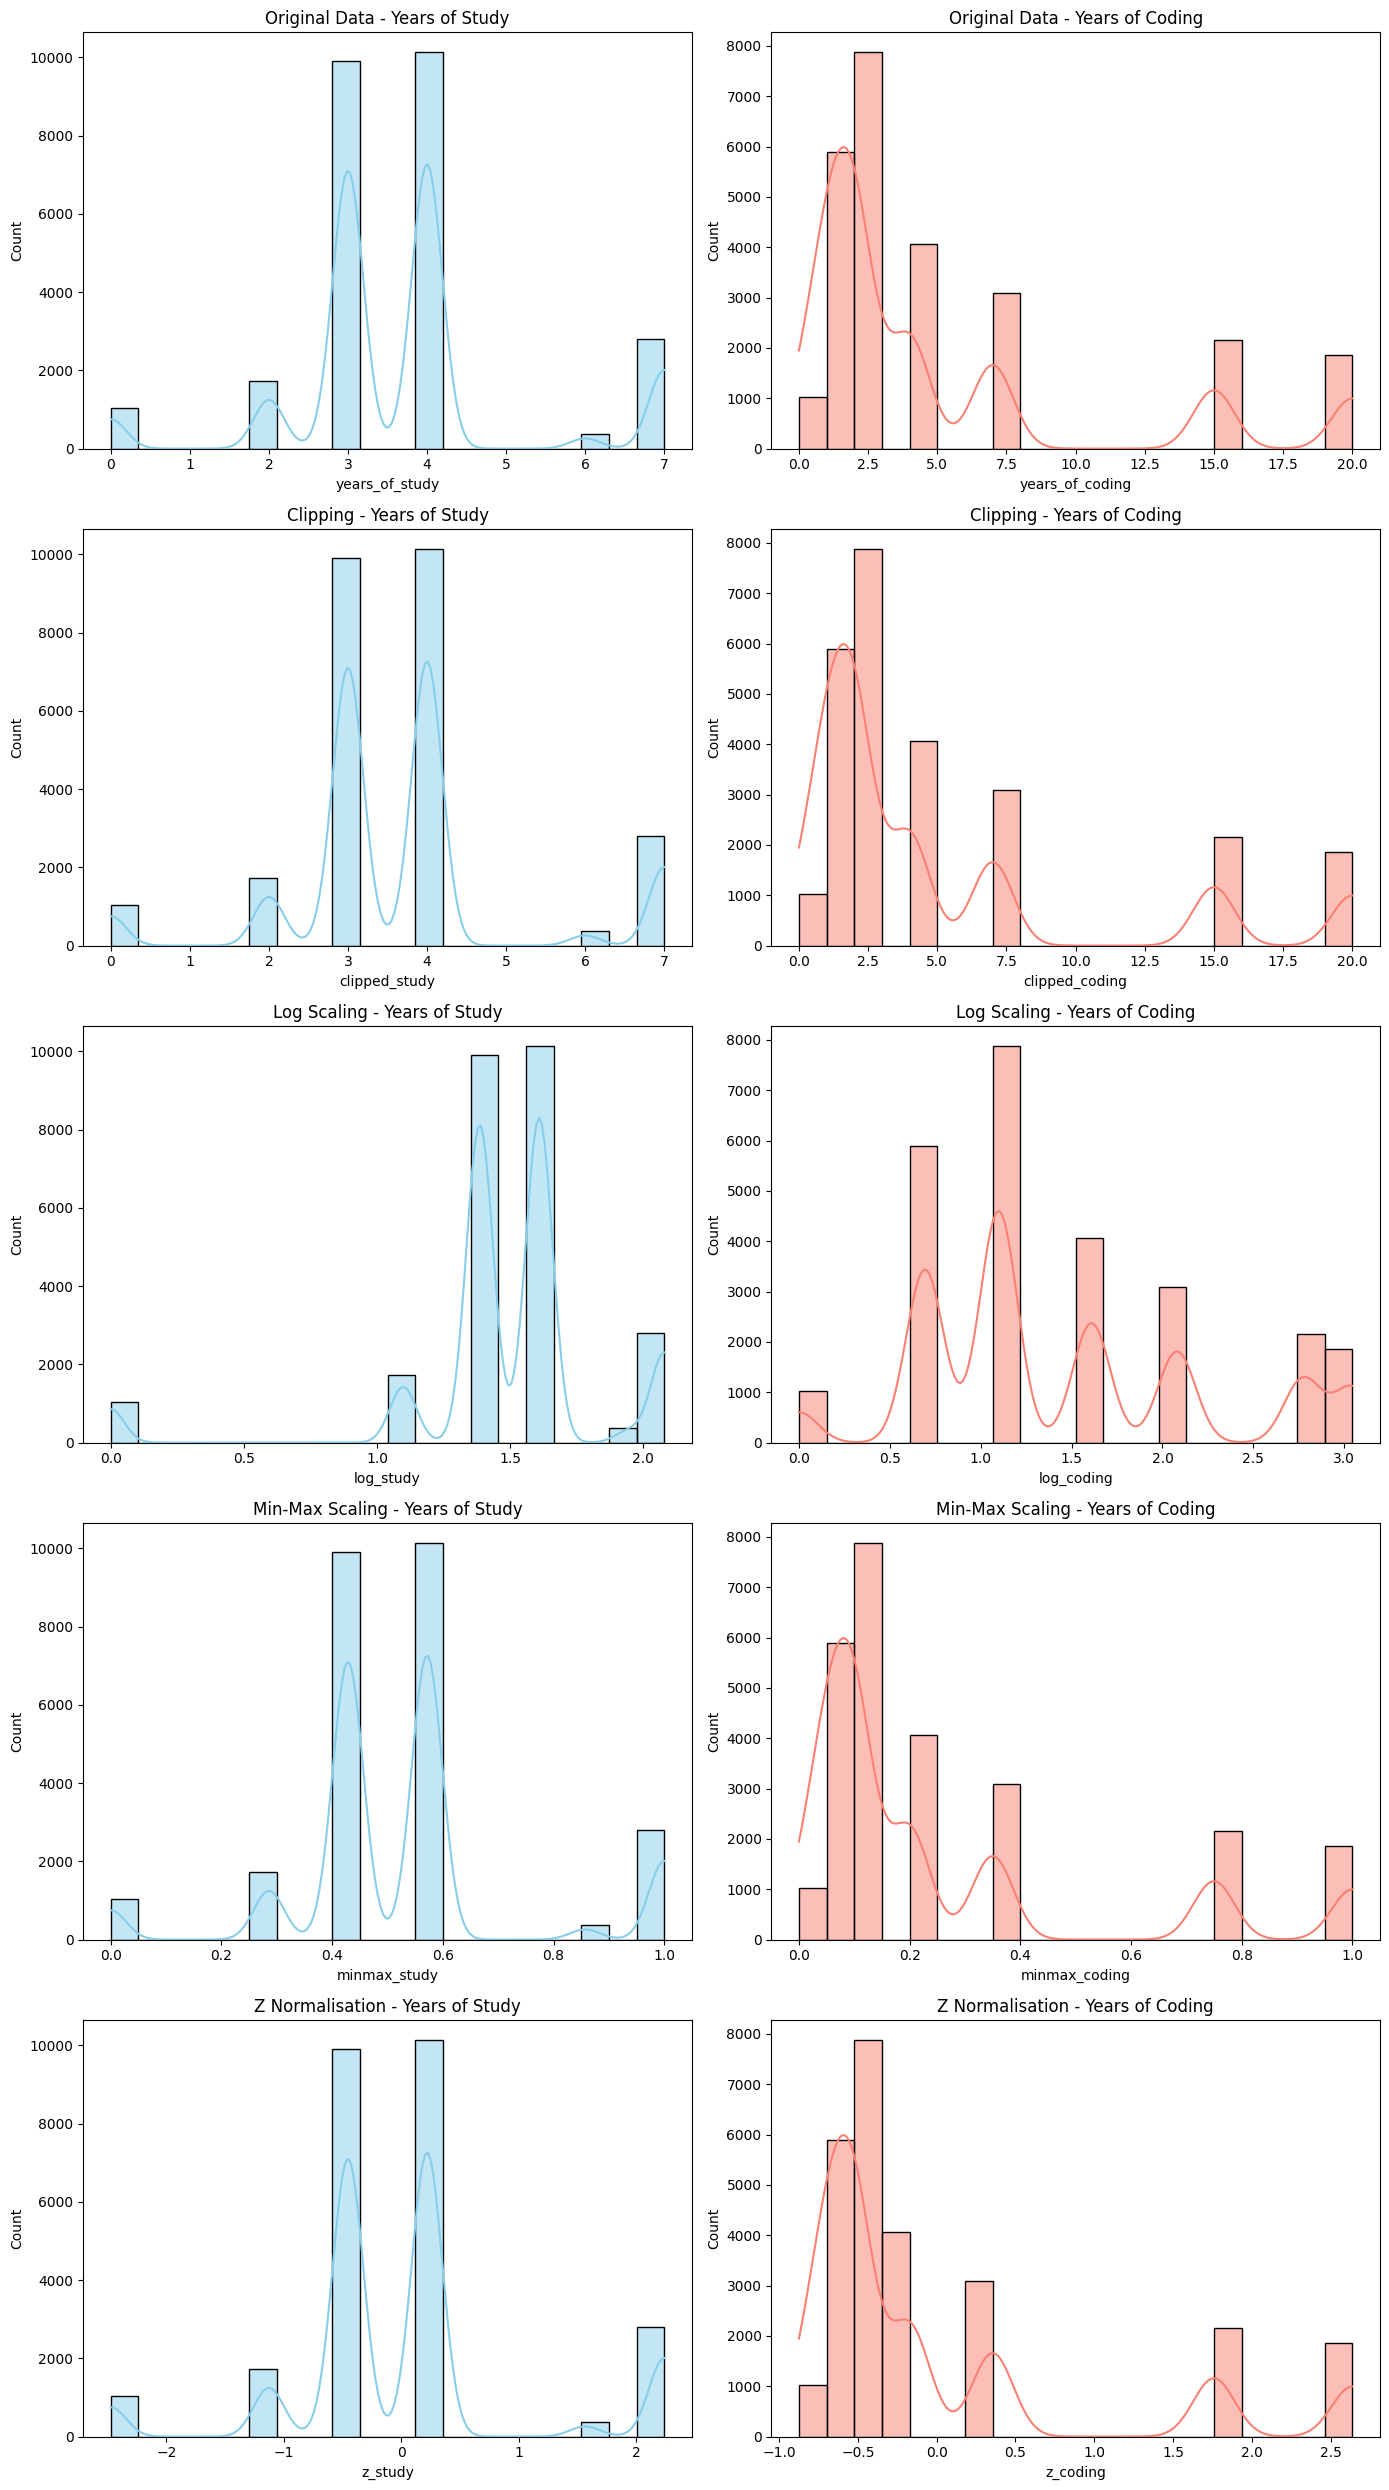

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

file_path = 'surveyDataSience.csv'
data = pd.read_csv(file_path, low_memory=False)

def map_studies(study_level):
    
    mapping = {
        "Bachelor’s degree": 3,
        "Master’s degree": 4,
        "Doctoral degree": 7,
        "Some college/university study without earning a bachelor’s degree": 2,
        "Professional doctorate": 6,
        "No formal education past high school": 0,
        "I prefer not to answer": 0
    }
    return mapping.get(study_level, np.nan)


def map_coding_experience(coding_years):
    
    mapping = {
        "I have never written code": 0,
        "< 1 years": 1,
        "1-3 years": 2,
        "3-5 years": 4,
        "5-10 years": 7,
        "10-20 years": 15,
        "20+ years": 20
    }
    return mapping.get(coding_years, np.nan)

data['years_of_study'] = data['Q4'].apply(map_studies)
data['years_of_coding'] = data['Q6'].apply(map_coding_experience)

df = data[['years_of_study', 'years_of_coding']].dropna()


df['clipped_study'] = np.clip(df['years_of_study'], 0, 7)
df['clipped_coding'] = np.clip(df['years_of_coding'], 0, 20)


df['log_study'] = np.log1p(df['years_of_study'])
df['log_coding'] = np.log1p(df['years_of_coding'])


scaler = MinMaxScaler()
df[['minmax_study', 'minmax_coding']] = scaler.fit_transform(df[['years_of_study', 'years_of_coding']])


scaler_std = StandardScaler()
df[['z_study', 'z_coding']] = scaler_std.fit_transform(df[['years_of_study', 'years_of_coding']])

print(df.head(10))


fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 25))
titles = ["Original Data", "Clipping", "Log Scaling", "Min-Max Scaling", "Z Normalisation"]
variables = [
    ("years_of_study", "years_of_coding"),
    ("clipped_study", "clipped_coding"),
    ("log_study", "log_coding"),
    ("minmax_study", "minmax_coding"),
    ("z_study", "z_coding")
]

for i, (var_study, var_coding) in enumerate(variables):
    ax = axes[i, 0]
    sns.histplot(df[var_study], bins=20, kde=True, ax=ax, color='skyblue')
    ax.set_title(f"{titles[i]} - Years of Study")
    ax.set_xlabel(var_study)
    
    ax = axes[i, 1]
    sns.histplot(df[var_coding], bins=20, kde=True, ax=ax, color='salmon')
    ax.set_title(f"{titles[i]} - Years of Coding")
    ax.set_xlabel(var_coding)

plt.tight_layout()
plt.show()


b).

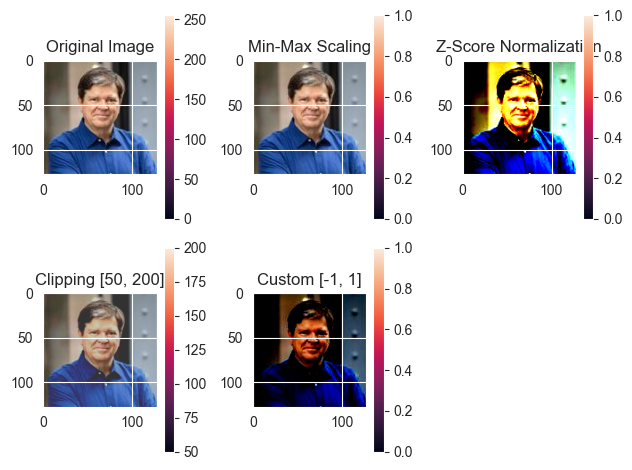

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_path = 'images/LeCun.jpg'
image = Image.open(image_path)
image_array = np.array(image)

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image_array)
plt.colorbar()

image_minmax = image_array / 255.0
plt.subplot(2, 3, 2)
plt.title("Min-Max Scaling")
plt.imshow(image_minmax)
plt.colorbar()

mean = image_array.mean(axis=(0, 1))
std = image_array.std(axis=(0, 1))
image_zscore = (image_array - mean) / std
plt.subplot(2, 3, 3)
plt.title("Z-Score Normalization")
plt.imshow(np.clip(image_zscore, 0, 1))
plt.colorbar()

image_clipped = np.clip(image_array, 50, 200)
plt.subplot(2, 3, 4)
plt.title("Clipping [50, 200]")
plt.imshow(image_clipped.astype(np.uint8))
plt.colorbar()

image_custom = 2 * (image_minmax - 0.5)
plt.subplot(2, 3, 5)
plt.title("Custom [-1, 1]")
plt.imshow(np.clip(image_custom, 0, 1))
plt.colorbar()

plt.tight_layout()
plt.show()

{'Mesaj': 0.0125, 'de': 0.05, 'informare': 0.0125, 'Cursul': 0.0125, 'și': 0.03125, 'laboratoarele': 0.0125, 'Inteligență': 0.01875, 'Artificială': 0.01875, 'vor': 0.00625, 'fi': 0.0125, 'o': 0.01875, 'provocare': 0.0125, 'pentru': 0.01875, 'toți': 0.00625, 'Suntem': 0.0125, 'convinși': 0.0125, 'că': 0.025, 'veți': 0.0125, 'realiza': 0.0125, 'proiecte': 0.0125, 'foarte': 0.00625, 'interesante': 0.0125, 'Vă': 0.0125, 'încurajăm': 0.0125, 'să': 0.04375, 'adresați': 0.0125, 'întrebări': 0.0125, 'atunci': 0.0125, 'când': 0.0125, 'ceva': 0.0125, 'nu': 0.0125, 'e': 0.00625, 'clar': 0.0125, 'atât': 0.00625, 'în': 0.01875, 'mod': 0.00625, 'live': 0.00625, 'cât': 0.00625, 'folosind': 0.00625, 'platforma': 0.00625, 'Teams': 0.0125, 'canalul': 0.01875, 'general': 0.01875, 'Dacă': 0.00625, 'ați': 0.00625, 'citit': 0.0125, 'până': 0.00625, 'aici': 0.0125, 'vă': 0.01875, 'rugăm': 0.00625, 'lăsați': 0.00625, 'un': 0.00625, 'mesaj': 0.00625, 'pe': 0.00625, 'cu': 0.00625, 'textul': 0.0125, 'Confiiiiiii

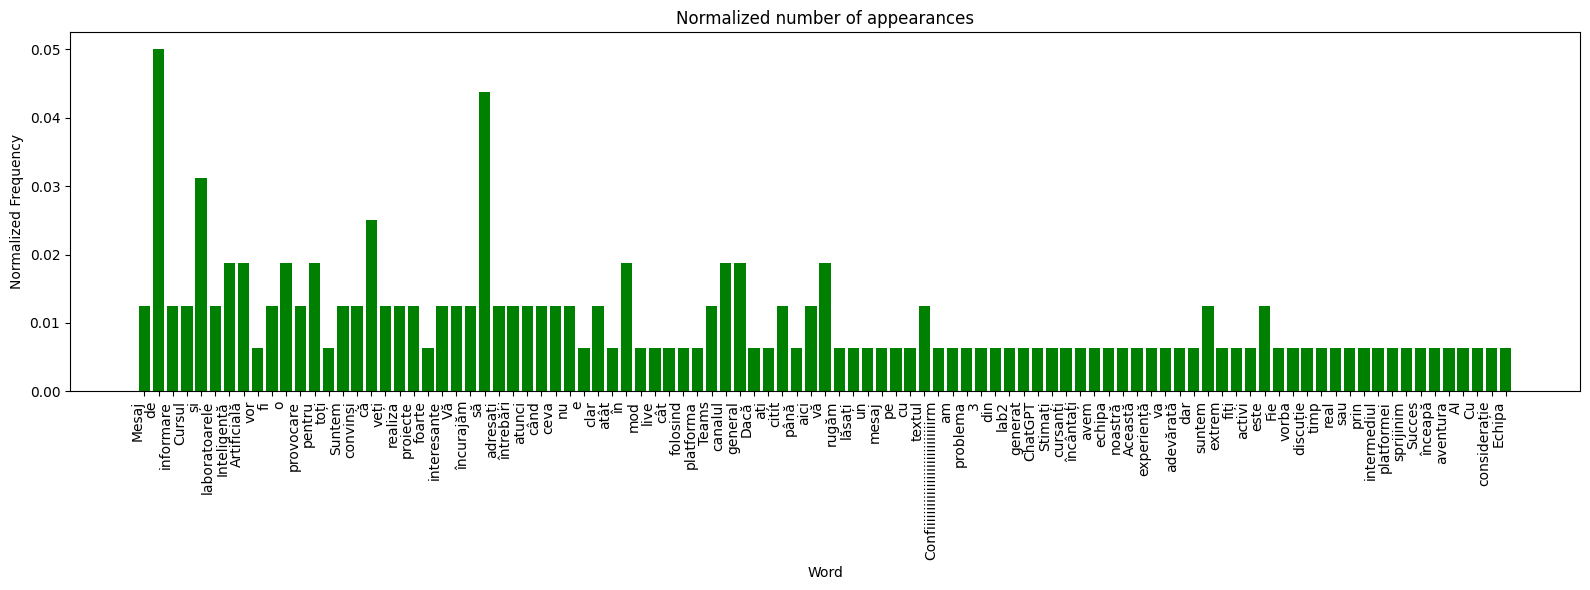

In [5]:
from collections import Counter
import re

def normword_counts(sentence):
    # Remove punctuation and split into words
    clean_text = re.sub(r'[^\w\s]', '', sentence)
    words = clean_text.split()
    count = Counter(words)
    total = sum(count.values())
    norm_cnt = {word: count / total for word, count in count.items()}
    return norm_cnt

with open('text.txt', 'r', encoding='utf-8') as file:
    sentence1 = file.read()


normalized = normword_counts(sentence1)
print(normalized)

import matplotlib.pyplot as plt

def plot_word_counts(normalized):
    words = list(normalized.keys())
    frequencies = list(normalized.values())

    plt.figure(figsize=(16, 6))
    plt.bar(words, frequencies, color='green')
    plt.xlabel('Word')
    plt.ylabel('Normalized Frequency')
    plt.title('Normalized number of appearances')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

plot_word_counts(normalized)